In [1]:
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import LogNorm
import scipy.stats as stats
from matplotlib import gridspec
import aplpy as apl #The Astronomy Plotting Library for python
import astropy
from astropy.stats import sigma_clip
from astropy.modeling import functional_models, models, fitting
import astropy.units as U
from astropy.coordinates import ICRS, Galactic, FK4, FK5, Angle, Latitude, Longitude
import astropy.constants as C
from astropy import wcs
import astropy.io.fits as fits
from astropy.io import ascii
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
from astropy.stats import signal_to_noise_oir_ccd as SNRas
#import spectral_cube as SC
#from spectral_cube import SpectralCube as sc
from astropy.wcs import WCS
matplotlib.use('Agg')
import matplotlib.cm as cm
#import astrometry as ast
import pyfits
import requests
import json
import os
from sklearn import datasets, linear_model
from scipy.optimize import curve_fit
import numpy.ma as ma
from astropy.table import Table, Column
import pyextract
import sewpy
import pandas as pd
from astropy import units as u
#import alipy

/home/lynge/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
a = np.array([[1,2],
             [4,5]])

b = np.array([[9,2],
             [4,3]])

c = np.array([1,9,float('nan')])

a = a.ravel()
b = b.ravel()

d = np.concatenate((a,b,c),axis=0)
print d
print np.nanvar(d)


[  1.   2.   4.   5.   9.   2.   4.   3.   1.   9.  nan]
7.8


In [3]:
quasJ = [os.path.join('/media/lynge/Lynge-Back-up/F9/g/',f) \
        for f in os.listdir('/media/lynge/Lynge-Back-up/F9/g/')]

qua1_RA_WORLD = SkyCoord('01:23:45.764 -58:48:20.82', unit=(u.hourangle, u.deg)).ra.degree
qua1_DEC_WORLD = SkyCoord('01:23:45.764 -58:48:20.82', unit=(u.hourangle, u.deg)).dec.degree

print qua1_RA_WORLD

sta1_RA_WORLD = SkyCoord('01:24:01.833 -58:49:45.66', unit=(u.hourangle, u.deg)).ra.degree 
sta1_DEC_WORLD = SkyCoord('01:24:01.833 -58:49:45.66', unit=(u.hourangle, u.deg)).dec.degree

sta2_RA_WORLD = SkyCoord('01:23:37.779 -58:49:37.24', unit=(u.hourangle, u.deg)).ra.degree
sta2_DEC_WORLD = SkyCoord('01:23:37.779 -58:49:37.24', unit=(u.hourangle, u.deg)).dec.degree

sta3_RA_WORLD = SkyCoord('01:23:34.704 -58:53:21.03', unit=(u.hourangle, u.deg)).ra.degree #TYC 8480-374-1
sta3_DEC_WORLD = SkyCoord('01:23:34.704 -58:53:21.03', unit=(u.hourangle, u.deg)).dec.degree

sky1_RA_WORLD = SkyCoord('01:23:46 -58:49:12', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky1_DEC_WORLD = SkyCoord('01:23:46 -58:49:12', unit=(u.hourangle, u.deg)).dec.degree

sky2_RA_WORLD = SkyCoord('01:23:53 -58:48:31', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky2_DEC_WORLD = SkyCoord('01:23:53 -58:48:31', unit=(u.hourangle, u.deg)).dec.degree

sky3_RA_WORLD = SkyCoord('01:23:42 -58:47:56', unit=(u.hourangle, u.deg)).ra.degree #Random patch of sky
sky3_DEC_WORLD = SkyCoord('01:23:42 -58:47:56', unit=(u.hourangle, u.deg)).dec.degree


MAG_STA1_g = 13.725
MAG_STA1_r = 13.242
MAG_STA1_i = 13.073
MAG_STA1_z = 12.234

MAG_STA2_g = 16.352
MAG_STA2_r = 15.232
MAG_STA2_i = 14.643
MAG_STA2_z = 13.707

MAG_STA3_g = 12.750
MAG_STA3_r = 12.674
MAG_STA3_i = 12.335
MAG_STA3_z = 12.287

MAG_err_STA1_g = 0.040/np.sqrt(6)
MAG_err_STA1_r = 0.022/np.sqrt(6)
MAG_err_STA1_i = 0.003/np.sqrt(6)
MAG_err_STA1_z = 0.778/np.sqrt(6)

MAG_err_STA2_g = 0.047/np.sqrt(6)
MAG_err_STA2_r = 0.019/np.sqrt(6)
MAG_err_STA2_i = 0.016/np.sqrt(6)
MAG_err_STA2_z = 0.736/np.sqrt(6)

MAG_err_STA3_g = 0.006/np.sqrt(3)
MAG_err_STA3_r = 0.008/np.sqrt(3)
MAG_err_STA3_i = 0.004/np.sqrt(3)
MAG_err_STA3_z = 0.006/np.sqrt(3)

MAG_VEGA_B = 0.03
MAG_VEGA_V = 0.03
MAG_VEGA_G = 0.03
MAG_VEGA_J = -0.18
MAG_VEGA_H = -0.03
MAG_VEGA_K = 0.13

MAG_VEGA_g = -0.08
MAG_VEGA_r = 0.16
MAG_VEGA_i = 0.37
MAG_VEGA_z = 0.54

FLUX_LAMBDA_VEGA_B = 632*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_V = 363.1*10**(-11)
FLUX_LAMBDA_VEGA_G = float('nan')
FLUX_LAMBDA_VEGA_J = 31.47*10**(-11)
FLUX_LAMBDA_VEGA_H = 11.38*10**(-11)
FLUX_LAMBDA_VEGA_K = 3.961*10**(-11)

FLUX_LAMBDA_VEGA_g = 466.9*10**(-11) #erg/cm**2/s/A
FLUX_LAMBDA_VEGA_r = 278.0*10**(-11)
FLUX_LAMBDA_VEGA_i = 185.2*10**(-11)
FLUX_LAMBDA_VEGA_z = 131.5*10**(-11)


FLUX_V_VEGA_B = 4.063*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_V = 3.636*10**(-20)
FLUX_V_VEGA_G = float('nan')
FLUX_V_VEGA_J = 1.589*10**(-20)
FLUX_V_VEGA_H = 1.021*10**(-20)
FLUX_V_VEGA_K = 0.64*10**(-20)

FLUX_V_VEGA_g = 3.631*10**(-20) #erg/cm**2/s/Hz
FLUX_V_VEGA_r = 3.631*10**(-20)
FLUX_V_VEGA_i = 3.631*10**(-20)
FLUX_V_VEGA_z = 3.631*10**(-20)


20.9406833333


In [4]:
def dist(mid,end):
    return np.sqrt((mid[0] - end[0])**2 + (mid[1] - end[1])**2)

In [5]:
def flux_cal(A_mag,B_mag,B_flux):
    '''Flux of A found through magnitude and flux of B'''
    return B_flux*10**((B_mag-A_mag)/2.5)

In [6]:
def Basic(quasar,header):
    '''Provides a basic list of neccesities from the fits header file for use in the later \
    flux determination, it does not serve an individual purpose beyound that'''
    AGNdata = quasar #np.rot90(np.rot90(np.fliplr(quasar)))
    #header = data[0].header
    #print header
    RAstd = header['CRVAL1']
    DECstd = header['CRVAL2']
    #print RAstd, DECstd
    pixspa = header['PIXSCALE']/(3600.)
    #print pixspa
    RAstdpix = header['CRPIX1']
    DECstdpix = header['CRPIX2']
    exptime = 10 # header['EXPTIME']
    return header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime

In [7]:
def curve(quasar,header,w,center,apparature):
    '''Determines the FLUX of the stellar object given the the numpy array of the image, \
    the header of the fits file, the astropy coordinate representation, \
    the object position and the apparature of interest'''
    header,AGNdata,RAstd,DECstd,pixspa,RAstdpix,DECstdpix,exptime = Basic(quasar,header)
    #AGNdata = np.swapaxes(AGNdata,0,1)
    y, x = np.ogrid[0:header['NAXIS1'],0:header['NAXIS1']]
    #w = np.swapaxes(w,0,1)
    #F_AGN = np.zeros((512,512,3)) #((int(2*apparature/pixspa)+1,int(2*apparature/pixspa)+1,3))
    #print center
    x1 = w.all_world2pix(center[0],center[1],0)
    x1,y1 = (x1[0]),(x1[1])
    if 15 < x1 < header['NAXIS1'] - 15 and 15 < y1 < header['NAXIS2'] - 15:
        try:
            mask = ((y-y1)**2 + (x-x1)**2) > (apparature/float(pixspa))**2
            AGNdata[mask] = float(0)
            mask = AGNdata == 0.
            rows = np.flatnonzero((~mask).sum(axis=1))
            cols = np.flatnonzero((~mask).sum(axis=0))
            AGNdata = AGNdata[rows.min():rows.max()+1, cols.min():cols.max()+1]
            #print apparature/float(pixspa)
        except:
            AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    else:
        AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    #if np.sum(AGNdata) < 500:
    #    AGNdata = np.array([[float('nan'),float('nan')],[float('nan'),float('nan')]])
    return AGNdata, x1, y1


In [8]:
def comp1(qua,sta):
    '''Code to determine the relation between the AGN and the Stellar flux as determined by either me \
    or by the SExtractor program respectively'''
    comp = qua/sta
    return comp

In [9]:
def SXtable(quas,aperture):
    header = pyfits.getheader(quas)
    phot_app = aperture*3600/header['PIXSCALE']
    np.set_printoptions(threshold=np.inf)
    sew = sewpy.SEW(params=['XMODEL_WORLD', 'YMODEL_WORLD', 'X2MODEL_WORLD', 'Y2MODEL_WORLD', 
                            'XMODEL_IMAGE', 'YMODEL_IMAGE', 'FLUX_RADIUS(1)', 'FLUX_APER','ELLIPTICITY'],
                    config={"DETECT_THRESH":10, 'DETECT_MINAREA':35, 'DETECT_MAXAREA':300000, 
                            "PHOT_FLUXFRAC":"0.5", 'PHOT_APERTURES':2*phot_app, 
                            'PIXEL_SCALE':header['PIXSCALE']}
                    , sexpath='/usr/bin/sextractor')
    out = sew(quas)
    return out

In [10]:
def flux(quas,aperture,main_RA_WORLD,main_DEC_WORLD):
    header = pyfits.getheader(quas)
    RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[0]
    DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,1)[1]
    output = float('nan')
    if 15 < RAmain < header['NAXIS1'] - 15 and 15 < DECmain < header['NAXIS2'] - 15: 
        out = SXtable(quas,aperture)
        RAmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[0]
        DECmain = WCS(quas).all_world2pix(main_RA_WORLD,main_DEC_WORLD,0)[1]
        #print out['table']['XMODEL_IMAGE'], out['table']['YMODEL_IMAGE']
        #print RAmain, DECmain

        for j in range(len(out['table']['XMODEL_IMAGE'])):
            #output['time'][i] = header['MJD-OBS']
            if RAmain - 25. < out['table']['XMODEL_IMAGE'][j] <  RAmain + 25. and \
            DECmain - 25. < out['table']['YMODEL_IMAGE'][j] < DECmain + 25.:
                #print 'YES'
                output = out['table']['FLUX_APER'][j]
                break
    else:
        output = float('nan')
        #print 'Done'
    return output


In [11]:
def SNR(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN'])*data1_2*header['EXPTIME']/(np.sqrt
                                                        (float(header['GAIN'])*data1_2*header['EXPTIME'] 
                                                         + float(header['GAIN'])*npix1*data2_2*header['EXPTIME']
                                                         
                                                         +npix1*header['RONOISE']**2))

def SNR11(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['EXPTIME']))

def SNR22(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(header['GAIN']*npix1*data2_2*header['EXPTIME'])

def SNR33(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float((npix1*header['RONOISE']**2))

def SNR44(data1,data2,header,ap1,ap2):
    npix1 = np.pi*ap1**2/((header['PIXSCALE']/3600.)**2)
    npix2 = np.pi*ap2**2/((header['PIXSCALE']/3600.)**2)
    #data2_1 = ((data2-data1)/npix2)*npix1
    data1_2 = data1
    data2_2 = abs(data2)
    
    return float(((header['GAIN'])*data1_2*header['EXPTIME'] + 
                  header['GAIN']*npix1*data2_2*header['EXPTIME'] +
                  npix1*header['RONOISE']**2))

#SNRas(10.,data1_2,abs(data2_2),0,header['RONOISE'],npix1,gain=header['GAIN'])

for i in range(len(quasJ)):
    print i
    data1, header = fits.getdata(quasJ[i],header=True) #RA---TAN
    data2 = data1
    #print header['CTYPE2']
    header['CTYPE1'] = "RA---TAN -SIP"
    header['CTYPE2'] = "DEC--TAN -SIP"
    #a_sky = curve(data2,header,WCS(quasJ[i]),
    #               (sky_RA_WORLD,sky_DEC_WORLD),0.002)[0]
    #a_sky_mean = np.mean(a_sky)
    #for j in range(len(np.shape(data[0]))):
    #    for k in range(len(np.shape(data[0]))):
    #        if data[j,k] != 0:
    #            data[j,k] = float(data[j,k]) - a_sky_mean
    #header['NDIT'] = 5
    '''header['A_ORDER'] = "0"
    header['B_ORDER'] = "0"
    header['AP_ORDER'] = "0"
    header['BP_ORDER'] = "0"
    header['A_0_2'] = "0"
    header['A_1_1'] = "0"
    header['A_2_0'] = "0"
    header['B_0_2'] = "0"
    header['B_1_1'] = "0"
    header['B_2_0'] = "0"
    header['AP_0_2'] = "0"
    header['AP_1_1'] = "0"
    header['AP_2_0'] = "0"
    header['AP_0_1'] = "0"
    header['AP_1_0'] = "0"
    header['BP_0_1'] = "0"
    header['BP_0_2'] = "0"
    header['BP_1_0'] = "0"
    header['BP_1_1'] = "0"
    header['BP_2_0'] = "0"'''
    fits.writeto(quasJ[i],data1,header,clobber=True)
    #print fits.getheader(quasH[i])['A_ORDER']

In [12]:
a = np.array([[0,2],
              [3,4]])
b = np.mean(np.array([[1,2,3],
                      [2,2,2],
                      [1,1,1]]))

a = a.astype(float)
mask = a != 0.
a[mask] = a[mask] - float(b)
print a

[[ 0.          0.33333333]
 [ 1.33333333  2.33333333]]


In [13]:
def error(SIGNAL_AGN,SIGNAL_STAR,SNR_AGN,SNR_STAR,STAR_MAG,STAR_MAG_err,VEGA_FLUX,VEGA_MAG):
    
    SIGNAL_ERR = abs(SIGNAL_AGN/SIGNAL_STAR)*np.sqrt(SNR_AGN**(-2) + SNR_STAR**(-2))
    
    FLUX_CAL_ERR = STAR_MAG_err
    
    SIGNAL = VEGA_FLUX*10**((VEGA_MAG-STAR_MAG)/2.5)
    
    FLUX_CAL = abs(SIGNAL_AGN/SIGNAL_STAR)*VEGA_FLUX*((np.log(10)/2.5)*10**((VEGA_MAG - STAR_MAG)/2.5))
    
    return np.sqrt((SIGNAL**2*SIGNAL_ERR**2 + FLUX_CAL**2*FLUX_CAL_ERR**2))

In [14]:
def SEXAGNflux(quas,aperture1):
    aperture2 = aperture1 + 0.003
    date = []
    flucompsta1 = []
    flucompsta2 = []
    flucompsta3 = []
    flucompsta4 = []
    flucompsta5 = []
    flucompsta6 = []
    flucompsta7 = []
    poissonAGN = []
    poisson529 = []
    poisson22 = []
    poissonHD = []
    ABS_FLUX_LAMBDA_1 = 0
    ABS_FLUX_LAMBDA_2 = 0
    ABS_FLUX_LAMBDA_3 = 0
    ABS_FLUX_V_1 = 0
    ABS_FLUX_V_2 = 0
    ABS_FLUX_V_3 = 0
    SNR_comp = []
    comp_array = np.zeros((len(quas),6))
    SNR_array = np.zeros((len(quas),8))
    SNR_part = np.zeros((len(quas),5))
    SNR_star = np.zeros((len(quas),4))
    noise_quasar = np.zeros((len(quas),4))
    signal = np.zeros((len(quas),4))
    #-----------------------------------------------------------------------------------------------
    for i in range(len(quas)):
        print 'Frame nr. ', i, quas[i]
        header = pyfits.getheader(quas[i])
        a_AGN = flux(quas[i],2*aperture1,qua1_RA_WORLD,qua1_DEC_WORLD)/header['EXPTIME']
        a2 = flux(quas[i],2*aperture1,sta1_RA_WORLD,sta1_DEC_WORLD)/header['EXPTIME']
        a3 = flux(quas[i],2*aperture1,sta2_RA_WORLD,sta2_DEC_WORLD)/header['EXPTIME']
        a4 = flux(quas[i],2*aperture1,sta3_RA_WORLD,sta3_DEC_WORLD)/header['EXPTIME']
        a_sky1 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky1_RA_WORLD,sky1_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a_sky2 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky2_RA_WORLD,sky2_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        a_sky3 = curve(pyfits.getdata(quas[i]),pyfits.getheader(quas[i]),WCS(quas[i]),
                   (sky3_RA_WORLD,sky3_DEC_WORLD),aperture1)[0]/header['EXPTIME']
        #a_AGN_1 = flux(quas[i],2*aperture2,qua1_RA_WORLD,qua1_DEC_WORLD)/header['DIT']
        #a2_1 = flux(quas[i],2*aperture2,sta1_RA_WORLD,sta1_DEC_WORLD)/header['DIT']
        #a3_1 = flux(quas[i],2*aperture2,sta2_RA_WORLD,sta2_DEC_WORLD)/header['DIT']
        #a4_1 = flux(quas[i],2*aperture2,sta3_RA_WORLD,sta3_DEC_WORLD)/header['DIT']
        signal[i,0] = a_AGN
        signal[i,1] = a2
        signal[i,2] = a3
        signal[i,3] = a4
        #-------------------------------------------------------------------------------------------
        #plt.figure(figsize=(3,3))
        #plt.imshow(a2)
        #plt.show()
        #-------------------------------------------------------------------------------------------
        a_AGN_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a2_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a3_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a4_pix = np.pi*(aperture1)**2/((header['PIXSCALE']/3600.)**2)
        a_sky_pix = np.count_nonzero(a_sky1)
        a_sky_2 = np.sum(a_sky1)/float(np.count_nonzero(a_sky1))
        a_sky = np.concatenate((a_sky1.ravel(),a_sky2.ravel(),a_sky3.ravel()),axis=0)
        a_sky_var = np.nanvar(a_sky)
        print a_sky_2,a_sky_var
        #a_AGN_pix_1 = np.pi*(2*aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a2_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a3_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a4_pix_1 = np.pi*(aperture2)**2/((header['PIXSCALE']/3600.)**2)
        #a_AGN_2 = (np.sum(a_AGN_1) - np.sum(a_AGN))/(float(np.count_nonzero(a_AGN_1)) - float(np.count_nonzero(a_AGN)))
        #a2_2 = (np.sum(a2_1) - np.sum(a2))/(float(np.count_nonzero(a2_1)) - float(np.count_nonzero(a2)))
        #a3_2 = (np.sum(a3_1) - np.sum(a3))/(float(np.count_nonzero(a3_1)) - float(np.count_nonzero(a3)))
        #a4_2 = (np.sum(a4_1) - np.sum(a4))/(float(np.count_nonzero(a4_1)) - float(np.count_nonzero(a4)))
        a_AGN_3 = a_AGN/a_AGN_pix #- (a_AGN_1 - a_AGN)/(a_AGN_pix_1 - a_AGN_pix) #Background subtracted flux/pixel/sec
        a2_3 = a2/a2_pix #- (a2_1 - a2)/(a2_pix_1 - a2_pix)
        a3_3 = a3/a3_pix #- (a3_1 - a3)/(a3_pix_1 - a3_pix)
        a4_3 = a4/a4_pix #- (a4_1 - a4)/(a4_pix_1 - a4_pix)
        #-------------------------------------------------------------------------------------------
        date.append(header['MJD-OBS'])
        #-------------------------------------------------------------------------------------------
        poissonAGN.append(np.sqrt(np.sum(a_AGN)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poissonHD.append(np.sqrt(np.sum(a2)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson22.append(np.sqrt(np.sum(a3)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        poisson529.append(np.sqrt(np.sum(a4)*header['EXPTIME']*header['GAIN'])) #header['EXPTIME']))
        #-------------------------------------------------------------------------------------------
        #if SNR1[i] < 70:
        #    flucompsta_AGN.append(float('nan'))
        #    flucompsta2.append(float('nan'))
        #    flucompsta3.append(float('nan'))
        #    flucompsta4.append(float('nan'))
        #    flucompsta6.append(float('nan'))
        #    comp_array[i,0] = int(date[i])
        #    comp_array[i,1] = float('nan')
        #    comp_array[i,2] = float('nan')
        #    comp_array[i,3] = float('nan')
        #else:
        flucompsta1.append(comp1(a_AGN_3,a2_3))
        flucompsta2.append(comp1(a_AGN_3,a3_3))
        flucompsta3.append(comp1(a_AGN_3,a4_3))
        SNR1 = SNR(a_AGN,np.sum(a_sky_var),header,aperture1,aperture1)
        #flucompsta4.append(comp1(a_AGN_3,a5_3))
        #flucompsta5.append(comp1(a_AGN_3,a6_3))
        #flucompsta6.append(comp1(a_AGN_3,a7_3))
        comp_array[i,0] = int(date[i])
        comp_array[i,1] = flucompsta1[i]
        comp_array[i,2] = flucompsta2[i]
        comp_array[i,3] = flucompsta3[i]
        comp_array[i,4] = SNR1
        comp_array[i,5] = a_AGN
        #comp_array[i,5] = flucompsta5[i]
        #comp_array[i,6] = flucompsta6[i]
        print a_AGN, a2, a3, a4
        SNR_part[i,0] = date[i]
        SNR_part[i,1] = SNR(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,2] = SNR11(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,3] = SNR22(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_part[i,4] = SNR33(a_AGN,np.sum(a_sky),header,aperture1,aperture1)\
        /SNR44(a_AGN,np.sum(a_sky),header,aperture1,aperture1)
        SNR_star[i,0] = header['MJD-OBS']
        SNR_star[i,1] = SNR(a2,np.sum(a_sky_var),header,aperture1,aperture1)
        SNR_star[i,2] = SNR(a3,np.sum(a_sky_var),header,aperture1,aperture1)
        SNR_star[i,3] = SNR(a4,np.sum(a_sky_var),header,aperture1,aperture1)
        noise_quasar[i,0] = header['MJD-OBS']
        noise_quasar[i,1] = float('nan')
        noise_quasar[i,2] = float('nan')
        noise_quasar[i,3] = float('nan')
        #SNR_array[i,0] = int(date[i])
        #SNR_array[i,1] = SNR(a_AGN,a_sky,header,aperture1,aperture1)
        #SNR_array[i,2] = SNR(a2,a_sky,header,aperture1,aperture1)
        #SNR_array[i,3] = SNR(a3,a_sky,header,aperture1,aperture1)
        #SNR_array[i,4] = SNR(a4,a_sky,header,aperture1,aperture1)
        #SNR_array[i,5] = SNR(a5,a_sky,header,aperture1,aperture1)
        #SNR_array[i,6] = SNR(a6,a_sky,header,aperture1,aperture1)
        #SNR_array[i,7] = SNR(a7,a_sky,header,aperture1,aperture1)
    #print 'YES'
    #-----------------------------------------------------------------------------------------------
    poissonAGN = np.array(poissonAGN)
    poissonHD = np.array(poissonHD)
    poisson22 = np.array(poisson22)
    poisson529 = np.array(poisson529)
    comp_array = comp_array[comp_array[:,0].argsort()]
    
    comp_array[:,1] = comp_array[:,1]*flux_cal(MAG_STA1_g,MAG_VEGA_g,FLUX_LAMBDA_VEGA_g)
    comp_array[:,2] = comp_array[:,2]*flux_cal(MAG_STA2_g,MAG_VEGA_g,FLUX_LAMBDA_VEGA_g)
    comp_array[:,3] = comp_array[:,3]*flux_cal(MAG_STA3_g,MAG_VEGA_g,FLUX_LAMBDA_VEGA_g)
    
    noise_quasar[:,1] = error(signal[:,0],signal[:,1],SNR_part[:,1],SNR_star[:,1],MAG_STA1_g,\
                              MAG_err_STA1_g,FLUX_LAMBDA_VEGA_g,MAG_VEGA_g)
    noise_quasar[:,2] = error(signal[:,0],signal[:,2],SNR_part[:,1],SNR_star[:,2],MAG_STA2_g,\
                              MAG_err_STA2_g,FLUX_LAMBDA_VEGA_g,MAG_VEGA_g)
    noise_quasar[:,3] = error(signal[:,0],signal[:,3],SNR_part[:,1],SNR_star[:,3],MAG_STA3_g,\
                              MAG_err_STA3_g,FLUX_LAMBDA_VEGA_g,MAG_VEGA_g)

    #-----------------------------------------------------------------------------------------------
    return comp_array,SNR_array,ABS_FLUX_LAMBDA_1,ABS_FLUX_LAMBDA_2,ABS_FLUX_LAMBDA_3,\
ABS_FLUX_V_1,ABS_FLUX_V_2,ABS_FLUX_V_3,date,SNR_part,SNR_star,noise_quasar

In [15]:
comp_array,SNR_array,ABS_FLUX_LAMBDA_1_1,ABS_FLUX_LAMBDA_2_1,ABS_FLUX_LAMBDA_3_1,\
ABS_FLUX_V_1_1,ABS_FLUX_V_2_1,ABS_FLUX_V_3_1,date_1,SNR_part_1,SNR_star_1,noise_quasar_1 = SEXAGNflux(quasJ,0.001)

Frame nr.  0 /media/lynge/Lynge-Back-up/F9/g/IMG2017037URs060.fits


/home/lynge/anaconda2/lib/python2.7/site-packages/pyfits/hdu/image.py:515: VerifyWarning: Invalid 'BLANK' keyword in header.  The 'BLANK' keyword is only applicable to integer data, and will be ignored in this HDU.
  warnings.warn(msg, VerifyWarning)
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
No handlers could be found for logger "sewpy.sewpy"


-0.0828024980484 0.407031416989
830.574666667 1397.70083333 nan nan
Frame nr.  1 /media/lynge/Lynge-Back-up/F9/g/IMG2017169URs087.fits
-0.0188228132281 0.0147403550188
1311.00083333 1781.935 nan 4345.41333333
Frame nr.  2 /media/lynge/Lynge-Back-up/F9/g/IMG2016301URs080.fits
-0.0188628967169 0.012999696625
nan nan nan nan
Frame nr.  3 /media/lynge/Lynge-Back-up/F9/g/IMG2016301URs081.fits
-0.0086678903382 0.0146276052498
nan nan nan nan
Frame nr.  4 /media/lynge/Lynge-Back-up/F9/g/IMG2016301URs082.fits
-0.03108347002 0.0153640180671
nan nan nan nan
Frame nr.  5 /media/lynge/Lynge-Back-up/F9/g/IMG2016321URs096.fits
-0.159768829795 4.09182437479
1334.7315 2042.89 nan nan
Frame nr.  6 /media/lynge/Lynge-Back-up/F9/g/IMG2016321URs097.fits
-0.174158098199 0.132221369616
1369.18433333 2032.365 nan nan
Frame nr.  7 /media/lynge/Lynge-Back-up/F9/g/IMG2016321URs098.fits
-0.188209060462 0.130495615253
1331.30783333 2028.23333333 nan nan
Frame nr.  8 /media/lynge/Lynge-Back-up/F9/g/IMG2016341URs02

In [16]:
print np.nanmean(comp_array[:,5]), np.nanstd(comp_array[:,5])
comp_array_mod = np.copy(comp_array)
comp_array_mod[comp_array[:,5] < np.nanmean(comp_array[:,5]) - 0.5*np.nanstd(comp_array[:,5]),1:5] = float('nan')


1193.58176596 324.745474985


In [17]:
print noise_quasar_1[:,1]
print noise_quasar_1[:,2]
print noise_quasar_1[:,3]
print comp_array[:,1]

[  1.40226985e-16   1.64452335e-16              nan              nan
              nan   1.46224110e-16   1.82405305e-16   1.75810957e-16
   1.49503161e-16   1.47854523e-16   1.46214803e-16   1.31442906e-16
   1.32171908e-16   1.28388658e-16   1.26862133e-16   1.29202327e-16
   1.35480566e-16   1.32948154e-16   1.33635008e-16   1.63036292e-16
   1.62128494e-16   1.67305904e-16   1.71649672e-16   1.66085501e-16
   1.67261252e-16              nan              nan              nan
   1.67263898e-16   1.67178022e-16   1.66983886e-16   1.64413620e-16
   1.65736366e-16              nan              nan              nan
              nan   2.39544119e-16   2.55568499e-16   1.49456064e-16
   1.49535953e-16   1.49890016e-16   1.51120474e-16   1.50890201e-16
   1.50716439e-16   1.46098006e-16   1.44694565e-16   1.49258719e-16
   1.49016855e-16   1.51146024e-16   1.49716350e-16   1.52776601e-16
   1.42578404e-16   1.45252294e-16   1.66601378e-16   1.59980345e-16
   1.67227267e-16]
[             n

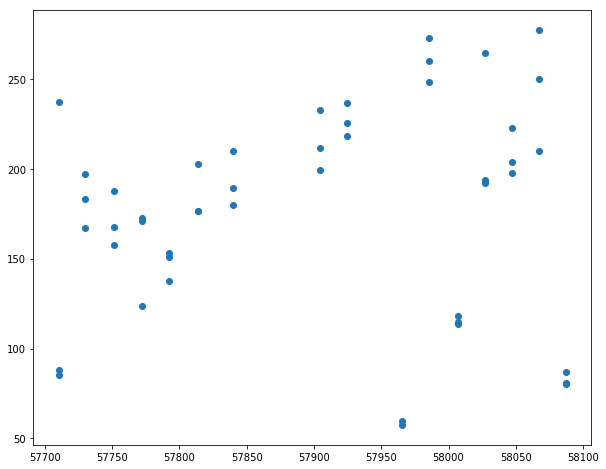

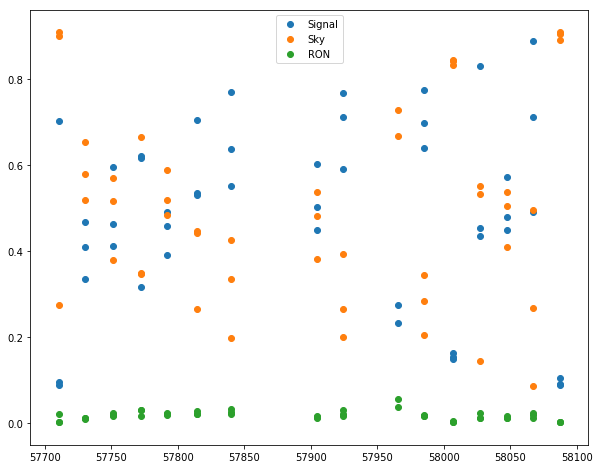

[ 57792.15325718  57924.28081769  57690.27430456  57690.27637618
  57690.27842138  57710.31376891  57710.31584191  57710.31791397
  57730.05960145  57730.0616744   57730.06371858  57751.21951109
  57751.22158402  57751.22365316  57772.17672755  57772.17880186
  57772.1808735   57792.15533016  57792.15737433  57814.07066593
  57814.07271684  57814.07476171  57840.01739726  57840.0194445
  57840.0214898   57875.33455383  57875.33659895  57875.33865169
  57904.30335493  57904.30540251  57904.30745079  57924.27877132
  57924.28286166  57945.30624362  57945.30829117  57945.31036169
  57965.36762567  57965.36967587  57965.37174803  57985.33858756
  57985.34066471  57985.34274005  58007.2782392   58007.28031034
  58007.28235692  58027.22581485  58027.22786242  58027.22991432
  58047.17128001  58047.17335414  58047.17539916  58067.11620378
  58067.11827559  58067.12032084  58087.24157672  58087.24364856
  58087.24569266]


In [18]:
plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,1])
plt.show()

plt.figure(figsize=(10,8))
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,2],label='Signal')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,3],label='Sky')
plt.scatter(SNR_part_1[:,0],SNR_part_1[:,4],label='RON')
plt.legend()
#plt.ylim([5*10**(-15),1.*10**(-14)])
plt.show()

print SNR_part_1[:,0]


In [19]:
print np.nanmean(comp_array[:,4])
print np.nanmean(comp_array_mod[:,4])

257.831217413
283.533037375


In [20]:
#print comp_array_mod
comp_array_mod_2 = np.zeros((len(comp_array_mod[:,0]),7))
#comp_array_mod_2[0,0] = comp_array_mod[0,0]
tjek = 0
acceptance = 0.01

for i in range(len(comp_array_mod)):
    if comp_array_mod[i,0] != comp_array_mod_2[tjek,0]:
        comp_array_mod_2[tjek,0] = comp_array_mod[i,0]
        com1 = []
        com2 = []
        com3 = []
        for j in range(len(comp_array_mod)):
            if comp_array_mod_2[tjek,0] == comp_array_mod[j,0]:
                com1.append(comp_array_mod[j,1])
                com2.append(comp_array_mod[j,2])
                com3.append(comp_array_mod[j,3])
        comp_array_mod_2[tjek,1] = np.nanmean(com1)
        comp_array_mod_2[tjek,2] = np.nanstd(com1)
        if comp_array_mod_2[tjek,2]/float(comp_array_mod_2[tjek,1]) > acceptance or float(comp_array_mod_2[tjek,1]) < 0:
            comp_array_mod_2[tjek,1] = float('nan')
            comp_array_mod_2[tjek,2] = float('nan')
        comp_array_mod_2[tjek,3] = np.nanmean(com2)
        comp_array_mod_2[tjek,4] = np.nanstd(com2)
        if comp_array_mod_2[tjek,4]/float(comp_array_mod_2[tjek,3]) > acceptance or float(comp_array_mod_2[tjek,3]) < 0:
            comp_array_mod_2[tjek,3] = float('nan')
            comp_array_mod_2[tjek,4] = float('nan')
        comp_array_mod_2[tjek,5] = np.nanmean(com3)
        comp_array_mod_2[tjek,6] = np.nanstd(com3)
        if comp_array_mod_2[tjek,6]/float(comp_array_mod_2[tjek,5]) > acceptance or float(comp_array_mod_2[tjek,5]) < 0:
            comp_array_mod_2[tjek,5] = float('nan')
            comp_array_mod_2[tjek,6] = float('nan')
        tjek = tjek + 1

print comp_array_mod_2



[[  5.76900000e+04              nan              nan              nan
               nan              nan              nan]
 [  5.76900000e+04              nan              nan              nan
               nan              nan              nan]
 [  5.76900000e+04              nan              nan              nan
               nan              nan              nan]
 [  5.77100000e+04              nan              nan              nan
               nan              nan              nan]
 [  5.77100000e+04              nan              nan              nan
               nan              nan              nan]
 [  5.77100000e+04              nan              nan              nan
               nan              nan              nan]
 [  5.77300000e+04   9.08904522e-15   1.31950492e-17              nan
               nan              nan              nan]
 [  5.77300000e+04   9.08904522e-15   1.31950492e-17              nan
               nan              nan              nan]
 [  5.77

/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: Mean of empty slice
/home/lynge/.local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice
/home/lynge/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: Mean of empty slice


In [21]:
#print comp_array
comp_array_2 = np.zeros((len(comp_array[:,0]),13))
#comp_array_2[0,0] = comp_array[0,0]
tjek = 0
acceptance = 0.01

for i in range(len(comp_array)):
    if comp_array[i,0] != comp_array_2[tjek,0]:
        comp_array_2[tjek,0] = comp_array[i,0]
        com1 = []
        com2 = []
        com3 = []
        for j in range(len(comp_array)):
            if comp_array_2[tjek,0] == comp_array[j,0]:
                com1.append(comp_array[j,1])
                com2.append(comp_array[j,2])
                com3.append(comp_array[j,3])
        comp_array_2[tjek,1] = np.mean(com1)
        comp_array_2[tjek,2] = np.std(com1)
        if comp_array_2[tjek,2]/float(comp_array_2[tjek,1]) > acceptance or float(comp_array_2[tjek,1]) < 0:
            comp_array_2[tjek,1] = float('nan')
            comp_array_2[tjek,2] = float('nan')
        comp_array_2[tjek,3] = np.mean(com2)
        comp_array_2[tjek,4] = np.std(com2)
        if comp_array_2[tjek,4]/float(comp_array_2[tjek,3]) > acceptance or float(comp_array_2[tjek,3]) < 0:
            comp_array_2[tjek,3] = float('nan')
            comp_array_2[tjek,4] = float('nan')
        comp_array_2[tjek,5] = np.mean(com3)
        comp_array_2[tjek,6] = np.std(com3)
        if comp_array_2[tjek,6]/float(comp_array_2[tjek,5]) > acceptance or float(comp_array_2[tjek,5]) < 0:
            comp_array_2[tjek,5] = float('nan')
            comp_array_2[tjek,6] = float('nan')
        tjek = tjek + 1

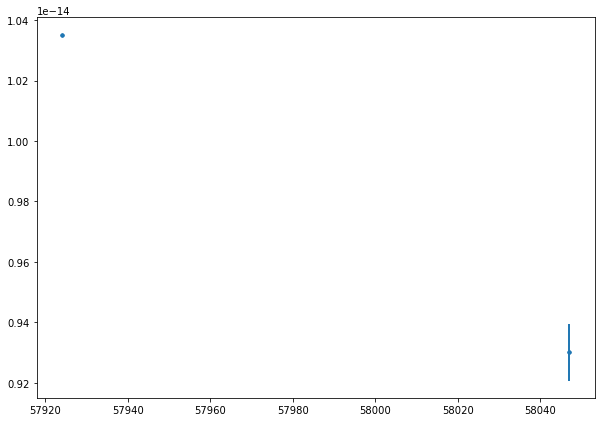

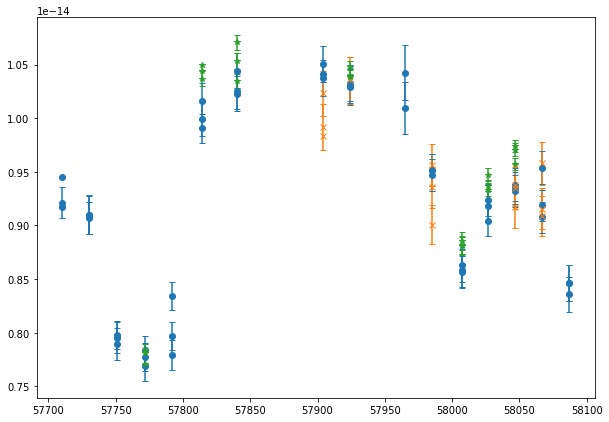

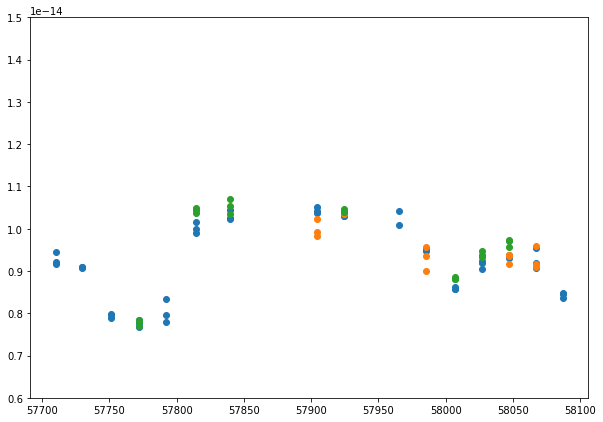

In [22]:
plt.figure(figsize=(10,7))
plt.errorbar(comp_array_mod_2[:,0],comp_array_mod_2[:,3],yerr=comp_array_mod_2[:,4],fmt='.')
#plt.ylim([0.02,0.07])
plt.show()

plt.figure(figsize=(10,7))
plt.errorbar(comp_array[:,0],comp_array[:,1],yerr=noise_quasar_1[:,1],fmt='o',capsize=3)
plt.errorbar(comp_array[:,0],comp_array[:,2],yerr=noise_quasar_1[:,2],fmt='x',capsize=3)
plt.errorbar(comp_array[:,0],comp_array[:,3],yerr=noise_quasar_1[:,3],fmt='*',capsize=3)
#plt.ylim([6*10**(-15),1.5*10**(-14)])
plt.show()

plt.figure(figsize=(10,7))
plt.scatter(comp_array[:,0],comp_array[:,1])
plt.scatter(comp_array[:,0],comp_array[:,2])
plt.scatter(comp_array[:,0],comp_array[:,3])
plt.ylim([6*10**(-15),1.5*10**(-14)])
plt.show()

np.savetxt('../NOVEMBER/F9_NOISE_g.txt',noise_quasar_1)
np.savetxt('../NOVEMBER/NOV-F9-g',comp_array)
np.savetxt('../NOVEMBER/F9_SNR_g.txt',SNR_part_1)

In [23]:
plt.figure(figsize=(20,14))
#plt.scatter(date,np.array(ABS_FLUX_LAMBDA_1),marker='x',\
#            color='b',label='Flux found from HD101274')
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_2),marker='x',\
            color='r',label='Flux found from Tycho-2 7740-22-1')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3),marker='x',\
            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.scatter(date_1,ABS_FLUX_LAMBDA_1_1,marker='o',\
            color='b',label='Flux found from SEX HD101274')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_2_1),marker='o',\
            color='r',label='Flux found from SEX Tycho-2 7740-22-1')
#plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3_1),marker='o',\
#            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
plt.ylim([0.07*10**(-14),1*10**(-14)])
#plt.xlim([57580,57600])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
plt.scatter(date,np.array(SNR1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
#plt.ylim([0.15,0.20])
#plt.xlim([57580,57600])
plt.legend()
plt.show()

num = np.nanargmax(ABS_FLUX_LAMBDA_2_1)

print ABS_FLUX_LAMBDA_2
print ABS_FLUX_LAMBDA_2[num]
print num
print date[num]
print quasJ[num]


NameError: name 'date' is not defined

In [ ]:
plt.figure(figsize=(20,14))
#plt.scatter(date,np.array(ABS_FLUX_LAMBDA_1),marker='x',\
#            color='b',label='Flux found from HD101274')
plt.scatter(date,np.array(ABS_FLUX_LAMBDA_2),marker='x',\
            color='r',label='Flux found from Tycho-2 7740-22-1')
#plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3),marker='x',\
#            color='g',label='Flux found from Tycho-2 7740-529-1')
#plt.scatter(date_1,ABS_FLUX_LAMBDA_1_1,marker='o',\
#            color='b',label='Flux found from SEX HD101274')
plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_2_1),marker='o',\
            color='r',label='Flux found from SEX Tycho-2 7740-22-1')
#plt.scatter(date_1,np.array(ABS_FLUX_LAMBDA_3_1),marker='o',\
#            color='g',label='Flux found from Tycho-2 7740-529-1')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
plt.ylim([0.2*10**(-14),0.3*10**(-14)])
#plt.xlim([57580,57600])
plt.legend()
plt.show()

plt.figure(figsize=(20,14))
plt.scatter(date,np.array(SNR1),marker='x',\
            color='b',label='Flux found from HD101274')
plt.xlabel('Days')
plt.ylabel('Flux (F_LAMBDA) (K-band)')
plt.title('Aperture 0.001 deg')
#plt.yscale('log')
#plt.ylim([0.15,0.20])
#plt.xlim([57580,57600])
plt.legend()
plt.show()

num = np.nanargmax(ABS_FLUX_LAMBDA_2_1)

print ABS_FLUX_LAMBDA_2
print ABS_FLUX_LAMBDA_2[num]
print num
print date[num]
print quasJ[num]


In [ ]:

plt.figure(figsize=(10,7))
plt.scatter(date,flucompsta2,marker='x',\
            color='b',label='AGN/Tycho-2 7740-22-1')
plt.scatter(date,flucompsta1*6.2,marker='x',\
            color='r',label='AGN/HD 101274 (scaled by 4.7)')
#plt.scatter(date,flucompsta4*2.2,marker='x',\
#            color='g',label='AGN/Tycho-2 7740-529-1 (scaled by 2.2)')
plt.xlabel('Days')
plt.ylabel('Relatve Flux (K-band)')
plt.title('Aperture 0.001 deg')
plt.ylim([1.45,2.1])
plt.legend()
plt.show()


